In [13]:
u_target = unitary_group.rvs(4, random_state=0)
ans = ansatz(2, 'cz', pattern=['sequ', 3])
ans.circuit().draw()

┌───────┐┌───────┐┌───────┐   ┌───────┐┌───────┐   ┌────────┐┌────────┐   »
q_0: ┤ RZ(0) ├┤ RX(1) ├┤ RZ(2) ├─■─┤ RY(6) ├┤ RX(7) ├─■─┤ RY(10) ├┤ RX(11) ├─■─»
     ├───────┤├───────┤├───────┤ │ ├───────┤├───────┤ │ ├────────┤├────────┤ │ »
q_1: ┤ RZ(3) ├┤ RX(4) ├┤ RZ(5) ├─■─┤ RY(8) ├┤ RX(9) ├─■─┤ RY(12) ├┤ RX(13) ├─■─»
     └───────┘└───────┘└───────┘   └───────┘└───────┘   └────────┘└────────┘   »
«     ┌────────┐┌────────┐
«q_0: ┤ RY(14) ├┤ RX(15) ├
«     ├────────┤├────────┤
«q_1: ┤ RY(16) ├┤ RX(17) ├
«     └────────┘└────────┘

CPU times: user 2.24 s, sys: 4.18 ms, total: 2.24 s
Wall time: 2.2 s


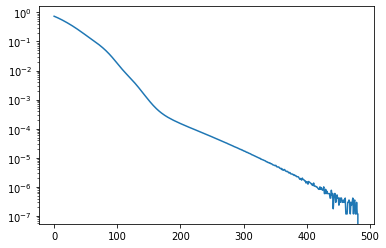

In [24]:
%%time
angles_history, loss_history = ans.learn(u2_target)

plt.plot(loss_history)
plt.yscale('log')

In [43]:
n_q = 4
depth = TLB(n_q)
u_target = unitary_group.rvs(2**n_q, random_state=0)
ans = ansatz(n_q, 'cz', pattern=['sequ', depth])
# ans.circuit().draw()

CPU times: user 19 s, sys: 157 ms, total: 19.2 s
Wall time: 17.1 s


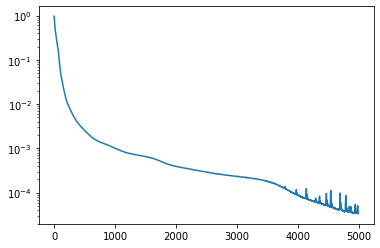

In [44]:
%%time
angles_history, loss_history = ans.learn(u_target)

plt.plot(loss_history)
plt.yscale('log')

CPU times: user 3min 21s, sys: 305 ms, total: 3min 22s
Wall time: 3min 20s


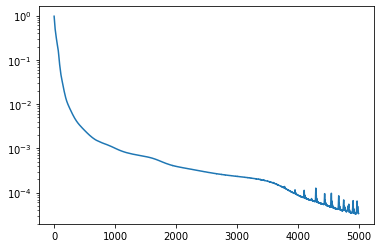

In [45]:
%%time
angles_history, loss_history = ans.learn(u_target, attempt_i=False)

plt.plot(loss_history)
plt.yscale('log')

In [46]:
%%time

n_q = 3
u_target = unitary_group.rvs(2**n_q, random_state=0)

best_angs_cx = []
best_loss_cx = []
for depth in range(15): # TLB(3)=14
    ans = ansatz(n_q, 'cz', pattern=['sequ', depth])
    angles, loss_history = ans.learn(u_target, target_disc=10e-4)
    loss_history = jnp.array(loss_history)
    
    best_loss_cx.append(jnp.min(loss_history))
    best_angs_cx.append(angles[jnp.argmin(loss_history)])

CPU times: user 2min 5s, sys: 2.9 s, total: 2min 8s
Wall time: 1min 57s


In [ ]:
%%time

n_q = 3
u_target = unitary_group.rvs(2**n_q, random_state=0)

best_angs_cz = []
best_loss_cz = []
for depth in range(15): # TLB(3)=14
    ans = ansatz(n_q, 'cx', pattern=['sequ', depth])
    angles, loss_history = ans.learn(u_target, target_disc=10e-4)
    loss_history = jnp.array(loss_history)
    
    best_loss_cz.append(jnp.min(loss_history))
    best_angs_cz.append(angles[jnp.argmin(loss_history)])

In [ ]:
plt.plot(best_loss_cx)
plt.plot(best_loss_cz)